<a href="https://colab.research.google.com/github/joezerr/mlStartUpProject/blob/main/Assignment1joe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORT THE LIBRARY

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import random as rand
import math
import pandas as pd
import numpy as np

from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split



IMPORT THE DATASETS

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/mk-gurucharan%20/Regression/master/Startups_Data.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [ ]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [ ]:
continuous=list(df.columns)
continuous.remove("State")
continuous

['R&D Spend', 'Administration', 'Marketing Spend', 'Profit']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

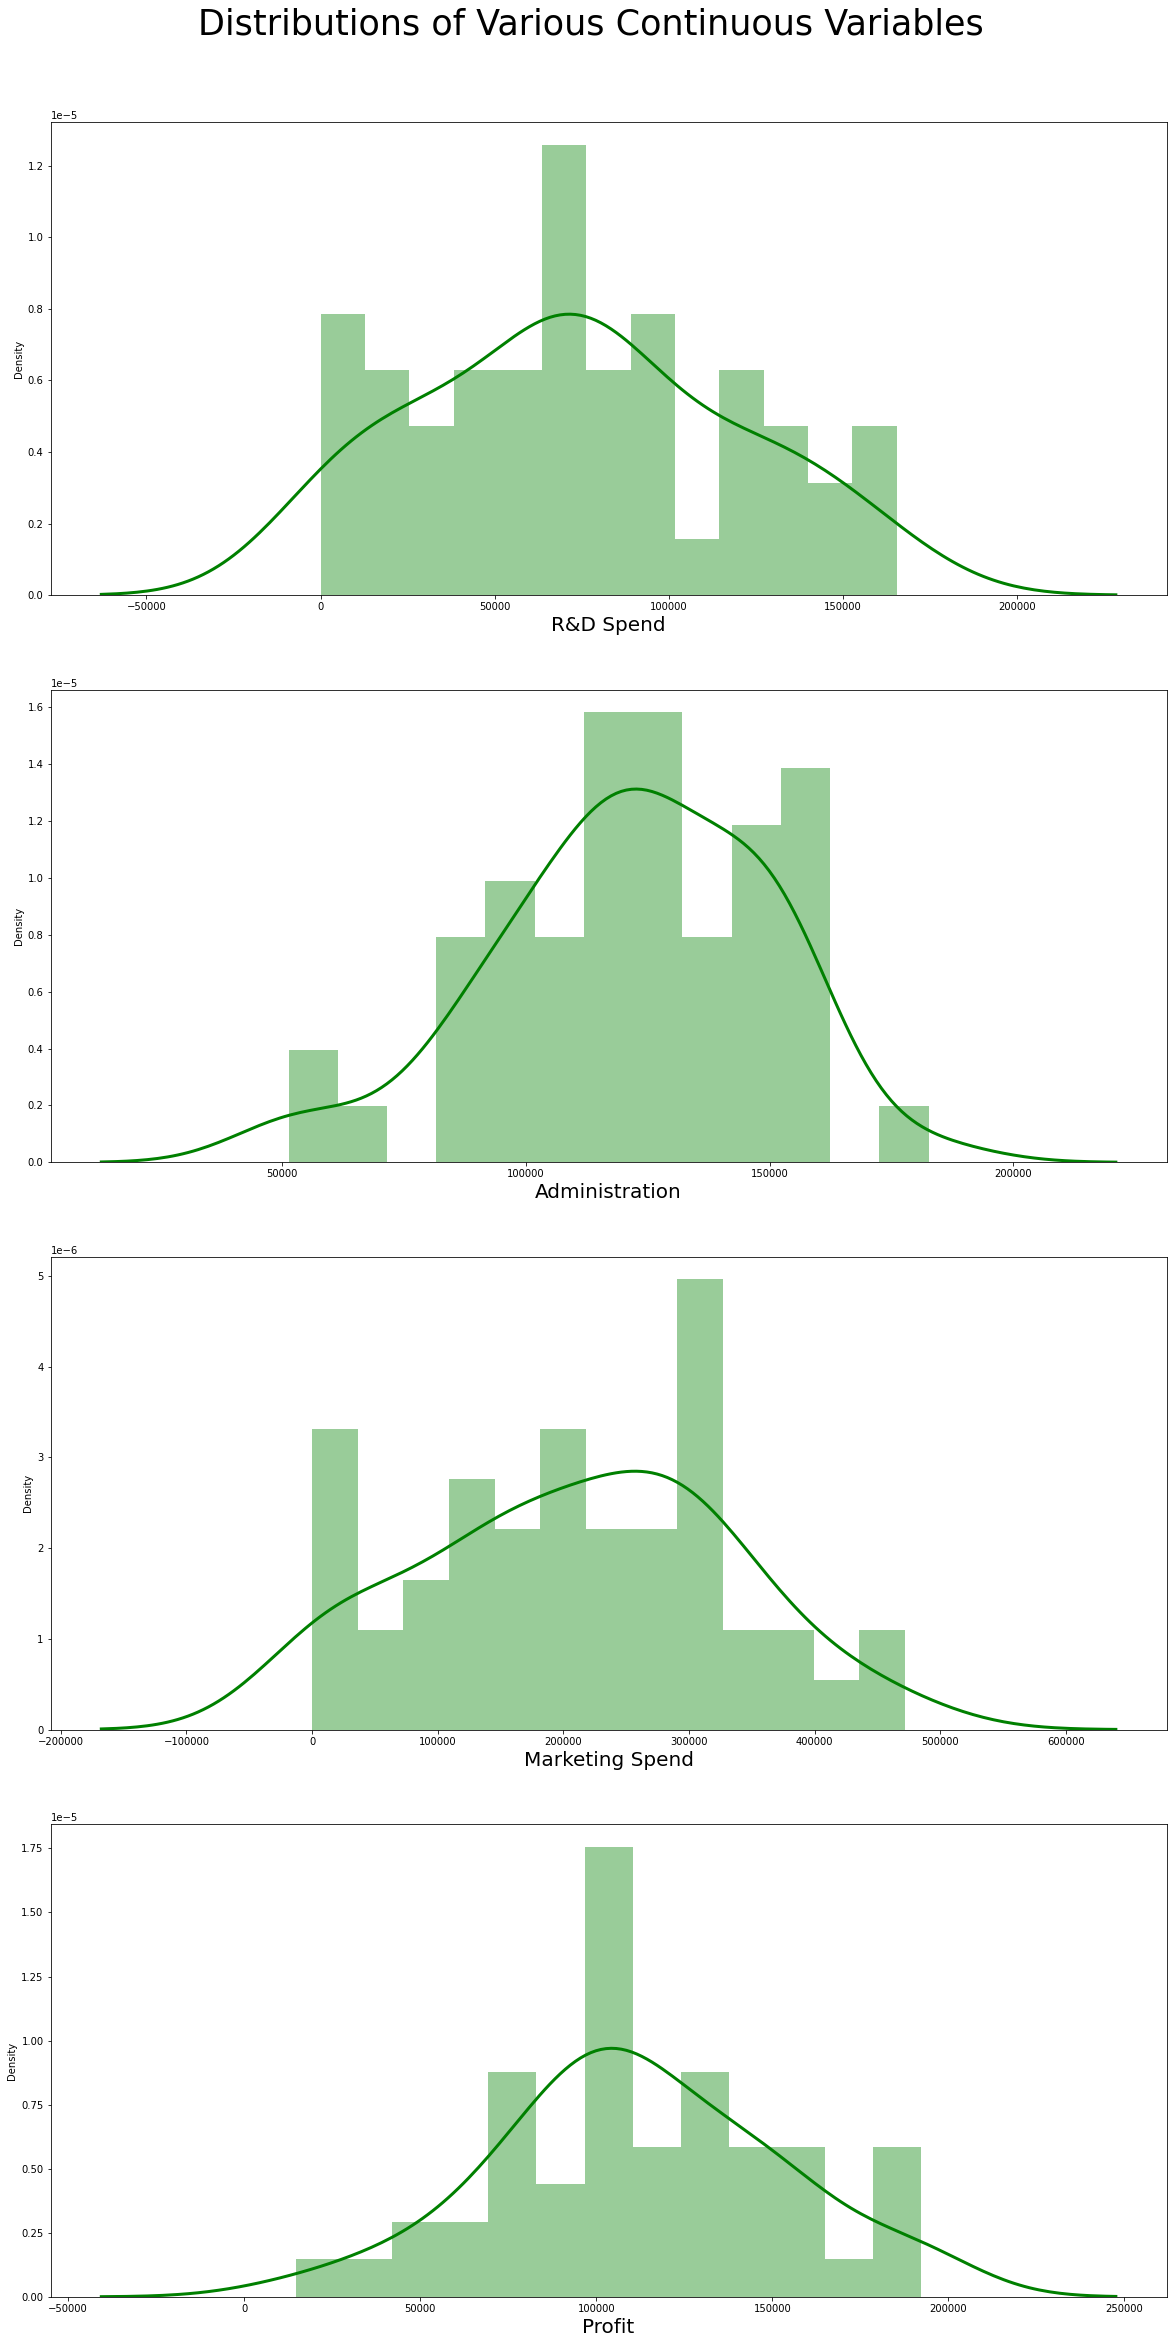

In [ ]:
figure, axes = plt.subplots(nrows=4, ncols=1, figsize=(20,40))
for col in continuous:
    i = continuous.index(col)
    sns.distplot(df[col], ax=axes[i], bins=13, kde_kws={"lw":3}, color="green")
    axes[i].set_xlabel(axes[i].get_xlabel(), fontsize=20)
    axes[i].set_ylabel(axes[i].get_ylabel(), fontsize=10)
figure.suptitle("Distributions of Various Continuous Variables", fontsize=35, y=0.92)
plt.show()

HEATMAP

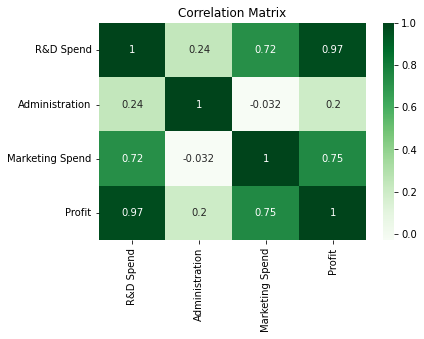

In [ ]:
sns.heatmap(data=df.corr(), cmap='Greens',annot=True)
plt.title("Correlation Matrix")
plt.show()

Didapatkan kesimpulan berdasarkan heatmap diatas, yaitu:


- R&D spend(0.97) & marketing spend (0.72) memiliki korelasi yang kuat dengan 
profit  (1)

- administration (0.2) memiliki korelasi terlemah dengan profit bila dibandingkan dengan R&D spend & marketing spend

- memilih salah satu dari variable yang kuat dengan profit antara R&D spend(0.97) & marketing spend (0.72) untuk di drop guna menghindari terjadinya multicollinearity, drop marketing spend(0.72)

In [ ]:
cont = df.drop(['Marketing Spend', 'Administration'], axis=1)
cont.head()

,R&D Spend,State,Profit
0,165349.20,New York,192261.83
1,162597.70,California,191792.06
2,153441.51,Florida,191050.39
3,144372.41,New York,182901.99
4,142107.34,Florida,166187.94


Ubah state variable (categorical data) menjadi numerical data menggunakan one-hot encoding

In [ ]:
oh_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

state = pd.DataFrame(oh_encoder.fit_transform(cont[['State']]))

state.index = cont['State'].index
state.columns = ['California', 'Florida', 'New York']

dropped_df = cont.drop('State', axis=1)

oh_df = pd.concat([dropped_df, state], axis=1)
oh_df.head()

,R&D Spend,Profit,California,Florida,New York
0,165349.20,192261.83,0.0,0.0,1.0
1,162597.70,191792.06,1.0,0.0,0.0
2,153441.51,191050.39,0.0,1.0,0.0
3,144372.41,182901.99,0.0,0.0,1.0
4,142107.34,166187.94,0.0,1.0,0.0


Cari dummy variable yang terbanyak kemudian hapus untuk menyelesaikan permasalah dummy variable trap

In [ ]:
print('California:', oh_df[oh_df['California'] == 1]['California'].count())
print('Florida:', oh_df[oh_df['Florida'] == 1]['Florida'].count())
print('New York:', oh_df[oh_df['New York'] == 1]['New York'].count())

California: 17
Florida: 16
New York: 17


Karena ada dua terbanyak, drop salah satu dari california dan new york, saya akan mendrop new york

In [ ]:
final_df = oh_df.drop('California', axis=1)
final_df.head()

,R&D Spend,Profit,Florida,New York
0,165349.20,192261.83,0.0,1.0
1,162597.70,191792.06,0.0,0.0
2,153441.51,191050.39,1.0,0.0
3,144372.41,182901.99,0.0,1.0
4,142107.34,166187.94,1.0,0.0


SPLIT DATASET INTO TRAIN DATA AND TEST DATA

In [ ]:
final_df.columns = ['R&D Spend', 'Profit', 'Florida', 'New York']

In [ ]:
x = final_df.drop('Profit', axis=1)

y = final_df['Profit']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.2, random_state = 35)

In [ ]:
x_train[0:20]

,R&D Spend,Florida,New York
35,46014.02,0.0,0.0
4,142107.34,0.0,1.0
18,91749.16,0.0,1.0
32,63408.86,1.0,0.0
14,119943.24,0.0,1.0
48,542.05,0.0,0.0
34,46426.07,1.0,0.0
2,153441.51,0.0,1.0
20,76253.86,1.0,0.0
37,44069.95,1.0,0.0


GRADIENT DESCENT

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc=StandardScaler()
x_transform=sc.fit_transform(x_train)

In [ ]:
class gradientDescent:
  def __init__(self, nvar):
    self.intercept = 0
    self.theta = np.random.randn(nvar)

  def predict(self, X, theta, intercept):
    return np.array(intercept + np.dot(X, theta))

  def update_theta(self, X, y, y_pred, alpha):
    deriv_theta = (2/len(y)) * np.dot((y_pred - y), X)
    return self.theta - (alpha * deriv_theta)

  def update_intercept(self, y, y_pred, alpha):
    deriv_intercept = (2/len(y)) * np.sum(y_pred - y)
    return self.intercept - (alpha * deriv_intercept)

  def get_MSE(self, y, y_pred):
    return np.sum((y - y_pred)**2) / len(y)

  def fit(self, X, y, epochs, alpha):
    loss = []
  
    for i in range(epochs):
      y_pred = self.predict(X, self.theta, self.intercept)
      self.theta = self.update_theta(X, y, y_pred, alpha)
      self.intercept = self.update_intercept(y, y_pred, alpha)
      loss.append(self.get_MSE(y, y_pred))
   
    return loss

In [ ]:
all_loss = []

for alpha in [0.0005, 0.001, 0.005, 0.01]:
  model = gradientDescent(x.shape[1])
  epochs = 5000
  loss = model.fit(x_transform, y_train, epochs, alpha)

  all_loss.append([alpha, loss])

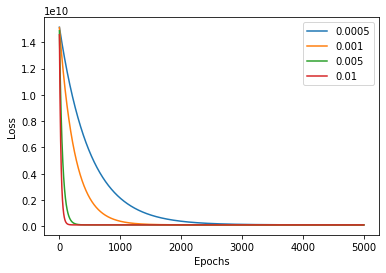

In [ ]:
for i in range(len(all_loss)):
  plt.plot(np.arange(1, epochs), all_loss[i][1][1:], label=all_loss[i][0])

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

PREDICT

In [ ]:
print(f'Intercept: {model.intercept}')
print(f'Theta: {model.theta}')

Intercept: 115399.64249999965
Theta: [41900.36347997  -183.42671318   611.19521264]


In [ ]:
w = model.theta
b = model.intercept

In [ ]:
def final_predict(X):
  return b + np.dot(X, w)

In [ ]:
y_pred = final_predict(sc.transform(x_test))
compare = pd.DataFrame({
    'y_pred': y_pred,
    'y_real': y_test
})

compare.head()

,y_pred,y_real
39,81282.658615,81005.76
26,114584.289520,105733.54
22,113437.998578,110352.25
31,101057.941255,97483.56
29,104897.295567,101004.64


MEAN SQUARED ERROR

In [ ]:
mean_squared_error(y_test, y_pred)

22851228.996432606

ROOT MEAN SQUARED ERROR

In [ ]:
math.sqrt(mean_squared_error(y_test, y_pred))

4780.295910969592

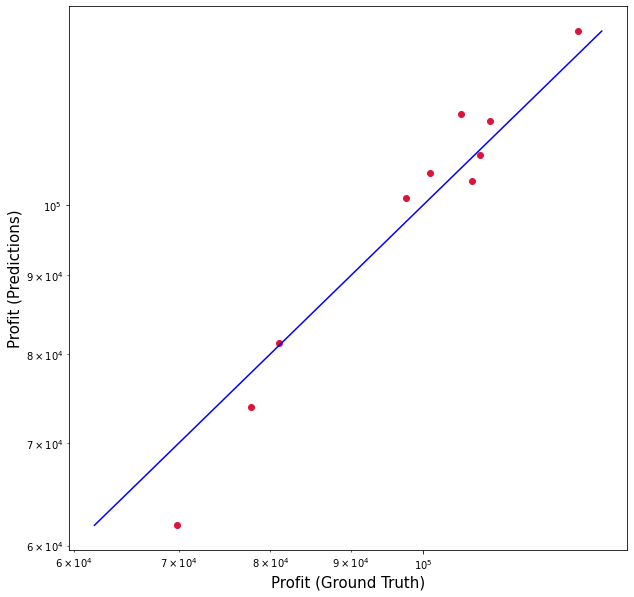

In [ ]:
plt.figure(figsize=(10, 10))
plt.scatter(y_test, y_pred, c='crimson')

plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_test), max(y_pred))
p2 = min(min(y_test), min(y_pred))

plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Profit (Ground Truth)', fontsize=15)
plt.ylabel('Profit (Predictions)', fontsize=15)
plt.show()